### Multiple Regression

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import sklearn.metrics as metrics
import scipy.stats as stats

In [31]:


ocean = pd.read_csv('ocean17.csv', index_col=0)
columns_to_drop = [ 'STheta','Depthm','T_degC','Wind_Dir']
ocean = ocean.drop(columns=columns_to_drop)
ocean[['Wea','Year', 'Month']] = ocean[[ 'Wea','Year', 'Month']].astype('object')

ocean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 765355 to 830772
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Salnty    2000 non-null   float64
 1   O2ml_L    2000 non-null   float64
 2   Year      2000 non-null   object 
 3   Month     2000 non-null   object 
 4   Lat_Dec   2000 non-null   float64
 5   Lon_Dec   2000 non-null   float64
 6   Bottom_D  2000 non-null   float64
 7   Wea       2000 non-null   object 
dtypes: float64(5), object(3)
memory usage: 140.6+ KB


In [32]:
df = ocean.copy()
dummies = pd.get_dummies(df, drop_first=True)

dummies

/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96692/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96692/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)
/var/folders/20/kt9gy6bn5dbdfmxkq50cn7ch0000gn/T/ipykernel_96692/785365793.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummies = pd.get_dummies(df, drop_first=True)


,Salnty,O2ml_L,Lat_Dec,Lon_Dec,Bottom_D,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,...,Month_7,Month_8,Month_9,Month_10,Month_11,Wea_1.0,Wea_2.0,Wea_3.0,Wea_4.0,Wea_6.0
765355,34.155,0.70,31.318333,-123.745000,3935.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765398,34.148,2.08,33.418333,-117.901666,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765400,34.184,1.75,33.418333,-117.901666,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765402,34.259,1.20,33.418333,-117.901666,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
765405,34.301,0.70,33.418333,-117.901666,635.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817760,34.108,1.45,36.053333,-122.018333,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817762,34.166,1.12,36.053333,-122.018333,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817765,34.191,0.72,36.053333,-122.018333,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
817767,34.255,0.40,36.053333,-122.018333,1339.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
"""The following code splits into predictor variables (x) 
and the target variable (y). Then the data is split into 80% of the data is used for training (x_train and y_train) 
and 20% is used for testing (x_test and y_test). Finally, a multi regression model is fit."""

x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

mlr = LinearRegression()  
mlr.fit(x_train, y_train)



x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     556.5
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:20:33   Log-Likelihood:                 3303.9
No. Observations:                2000   AIC:                            -6554.
Df Residuals:                    1973   BIC:                            -6403.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8865      0.117    306.710      0.0

In [34]:
""" The code is evaluating the performance of the linear regression model using various metrics"""
y_pred = mlr.predict(x_test)
x = dummies.iloc[:, 1:]
# print(y_pred)

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(mlr.score(x, y) * 100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.96
Mean Absolute Error: 0.03116829590256165
Mean Square Error: 0.0018919283917661629
Root Mean Square Error: 0.043496303196549506


In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
"""This code preforms a 5 k-fold validaton """
# Split the data into features (x) and target variable (y)
x = dummies.iloc[:, 1:]
y = dummies.iloc[:, :1]

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=100)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=100)

# Linear Regression Model Fitting using scikit-learn
mlr = LinearRegression()

# Combine training and validation sets for cross-validation
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='r2')

# Train the model on the combined training and validation sets
mlr.fit(x_combined, y_combined)

# Model performance on training set
train_r2 = mlr.score(x_train, y_train) * 100
train_meanAbErr = metrics.mean_absolute_error(y_train, mlr.predict(x_train))
train_meanSqErr = metrics.mean_squared_error(y_train, mlr.predict(x_train))
train_rootMeanSqErr = np.sqrt(train_meanSqErr)

print('Training Set Performance:')
print('R squared: {:.2f}'.format(train_r2))
print('Mean Absolute Error:', train_meanAbErr)
print('Mean Squared Error:', train_meanSqErr)
print('Root Mean Squared Error:', train_rootMeanSqErr)

# Model performance on testing set
test_r2 = mlr.score(x_test, y_test) * 100
test_meanAbErr = metrics.mean_absolute_error(y_test, mlr.predict(x_test))
test_meanSqErr = metrics.mean_squared_error(y_test, mlr.predict(x_test))
test_rootMeanSqErr = np.sqrt(test_meanSqErr)

print('\nTesting Set Performance:')
print('R squared: {:.2f}'.format(test_r2))
print('Mean Absolute Error:', test_meanAbErr)
print('Mean Squared Error:', test_meanSqErr)
print('Root Mean Squared Error:', test_rootMeanSqErr)

# Cross-validation scores
print('\nCross-Validation Scores:')
print('R squared scores:', cv_scores)
print('Average R squared: {:.2f}'.format(np.mean(cv_scores) * 100))

# Calculate and print cross-validated Mean Squared Error
cv_mse_scores = cross_val_score(mlr, x_combined, y_combined, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Multiply by -1 to get positive MSE scores
print('Mean Squared Error scores:', cv_mse_scores)
print('Average Mean Squared Error: {:.4f}'.format(np.mean(cv_mse_scores)))


Training Set Performance:
R squared: 88.41
Mean Absolute Error: 0.030687600462884324
Mean Squared Error: 0.0020906908077737555
Root Mean Squared Error: 0.045724072519557526

Testing Set Performance:
R squared: 88.52
Mean Absolute Error: 0.030616948202810003
Mean Squared Error: 0.0019305767832282085
Root Mean Squared Error: 0.04393832931767216

Cross-Validation Scores:
R squared scores: [0.85754636 0.87368698 0.89012388 0.85702037 0.85130919]
Average R squared: 86.59
Mean Squared Error scores: [0.00331026 0.00186193 0.00157311 0.00283728 0.00273964]
Average Mean Squared Error: 0.0025


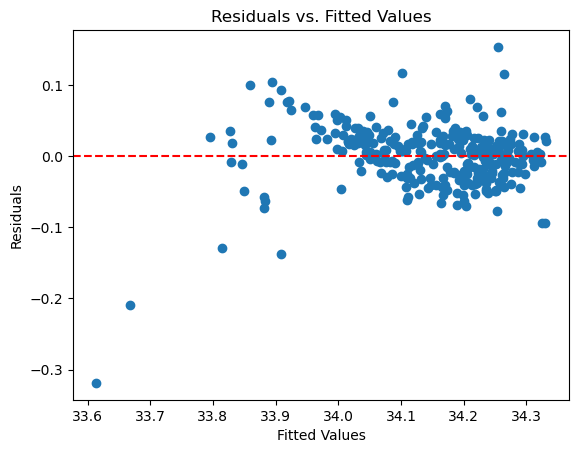

In [36]:
""" This code produces a Residuals vs. Fitted Values plot """

# Get the predicted values
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plotting
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


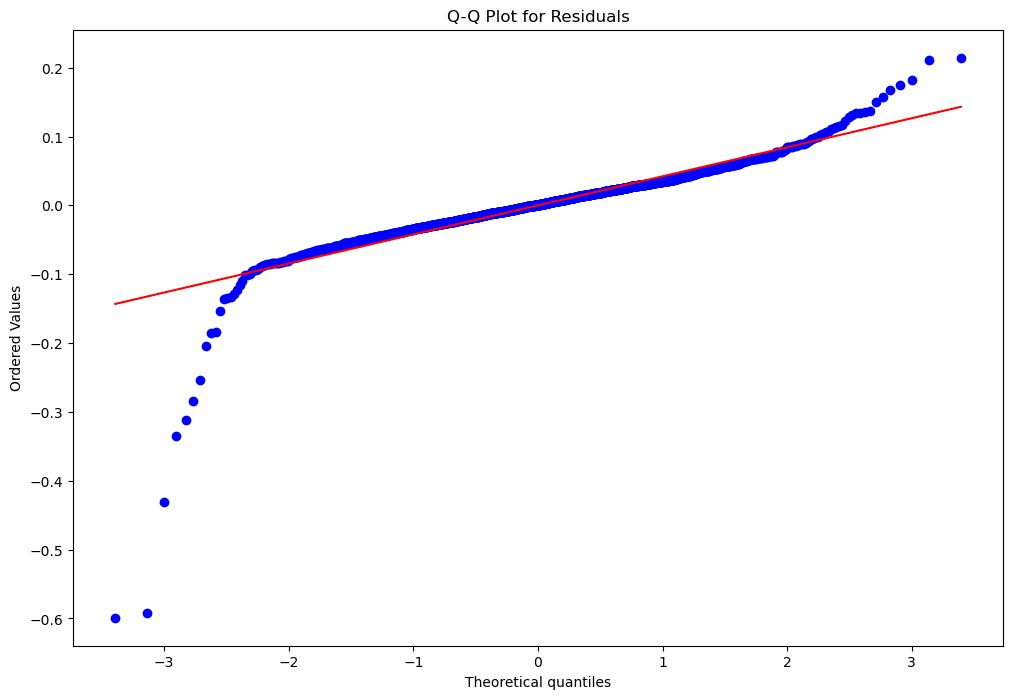

In [37]:
""" This code produces a Q-Q plot for Residuals """

residuals = model.resid

# Combine residuals for all predictor columns
std_resid = residuals 

# Q-Q plot
plt.figure(figsize=(12, 8))
probplot(std_resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()


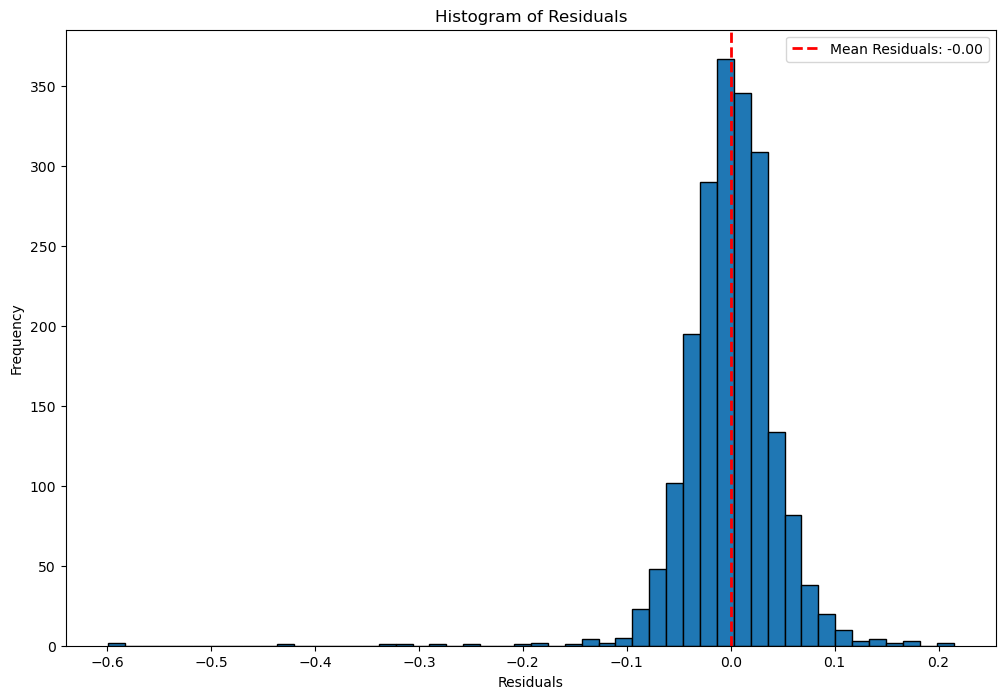

In [38]:
"Code creates a Histogram of residuals"


residuals = model.resid

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Calculate and plot the mean of residuals
mean_residuals = residuals.mean()
plt.axvline(x=mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residuals: {mean_residuals:.2f}')

plt.legend()
plt.show()

In [39]:
""" Finding the Variance Inflation Factor values of the data"""

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

# Add a constant term to the predictor matrix
x_train = sm.add_constant(x_train)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

# Display VIF values
print("VIF values:")
print(vif_data)

VIF values:
     Variable           VIF
0       const  12253.617724
1      O2ml_L      1.210177
2     Lat_Dec      1.786796
3     Lon_Dec      3.533027
4    Bottom_D      3.928405
5   Year_2005      3.249084
6   Year_2006      4.006300
7   Year_2007      3.442214
8   Year_2008      1.020762
9   Year_2009      1.109220
10  Year_2010      2.250886
11  Year_2011      1.772248
12  Year_2012      1.042350
13    Month_2      2.375642
14    Month_3      1.218006
15    Month_4      2.243201
16    Month_6      1.173232
17    Month_7      2.707515
18    Month_8      1.134128
19    Month_9      1.833890
20   Month_10      1.791659
21   Month_11      2.403970
22    Wea_1.0      2.599289
23    Wea_2.0      2.689285
24    Wea_3.0      1.012414
25    Wea_4.0      1.366695
26    Wea_6.0      1.072972
